In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('clean_movie.csv', index_col=0)
df.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117.0,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127.0,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States"
4,M3gan,6.4,2022,December,PG-13,102.0,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,1.712539e+08,United States
6,Amsterdam,6.1,2022,October,R,134.0,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,3.124581e+07,"United States, Japan"


In [3]:
df.shape

(1651, 13)

Loại phim và Budget và imcome của top 10 loại phim có số lượng nhiều nhất

In [4]:
arr = np.concatenate(np.array(df["Genre"].str.split(', ')))
unique_values, value_counts = np.unique(arr, return_counts=True)
dic = {}
for value, count in zip(unique_values, value_counts):
    dic[value] = count
dic = dict(sorted(dic.items(), key=lambda x:x[1], reverse=True))
top_10_genre = list(dic.keys())[:10]
top_10_genre

['Drama',
 'Action',
 'Comedy',
 'Adventure',
 'Thriller',
 'Crime',
 'Romance',
 'Sci-Fi',
 'Horror',
 'Fantasy']

In [5]:
dic_10_genre_budge_income = pd.DataFrame([],columns=['Budget', 'Income'])
for i in top_10_genre:
    df_temp = df[df["Genre"].apply(lambda x: i in x.split(', '))]
    dic_10_genre_budge_income.loc[i,'Budget'] = int(df_temp['Budget'].sum())
    dic_10_genre_budge_income.loc[i,'Income'] = int(df_temp['Income'].sum())
    
dic_10_genre_budge_income

,Budget,Income
Drama,30276198912,96431059732
Action,59241320086,189439804601
Comedy,29961221232,102850802208
Adventure,57921220720,204172892900
Thriller,13507068242,46684428044
Crime,11660089916,34783548229
Romance,7279694260,25458749879
Sci-Fi,20974390454,71486476377
Horror,4549208910,17216251090
Fantasy,16680073355,57346188556


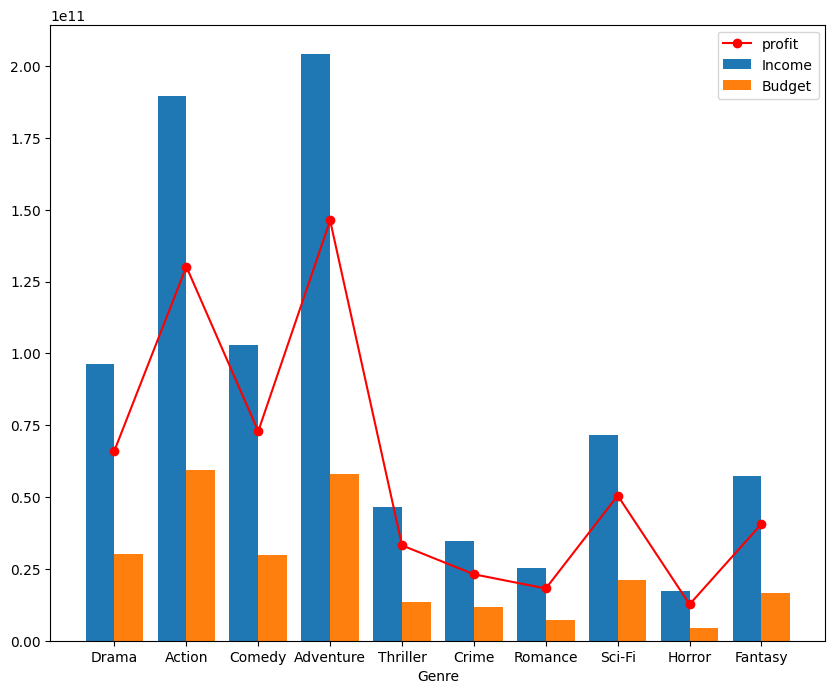

In [6]:
axis = np.arange(len(dic_10_genre_budge_income.index))

plt.figure(figsize=(10,8)) 
plt.bar(axis - 0.2, dic_10_genre_budge_income['Income'], 0.4, label = 'Income')
plt.bar(axis + 0.2, dic_10_genre_budge_income['Budget'], 0.4, label = 'Budget')
plt.plot(axis ,dic_10_genre_budge_income['Income'] - dic_10_genre_budge_income['Budget'], marker='o', color='red', label='profit')
plt.xticks(axis, dic_10_genre_budge_income.index)
plt.xlabel("Genre")
plt.title("")
plt.legend()
plt.show()

Rating tangw the nao qua tung nam

In [7]:
df.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117.0,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127.0,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States"
4,M3gan,6.4,2022,December,PG-13,102.0,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,1.712539e+08,United States
6,Amsterdam,6.1,2022,October,R,134.0,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,3.124581e+07,"United States, Japan"


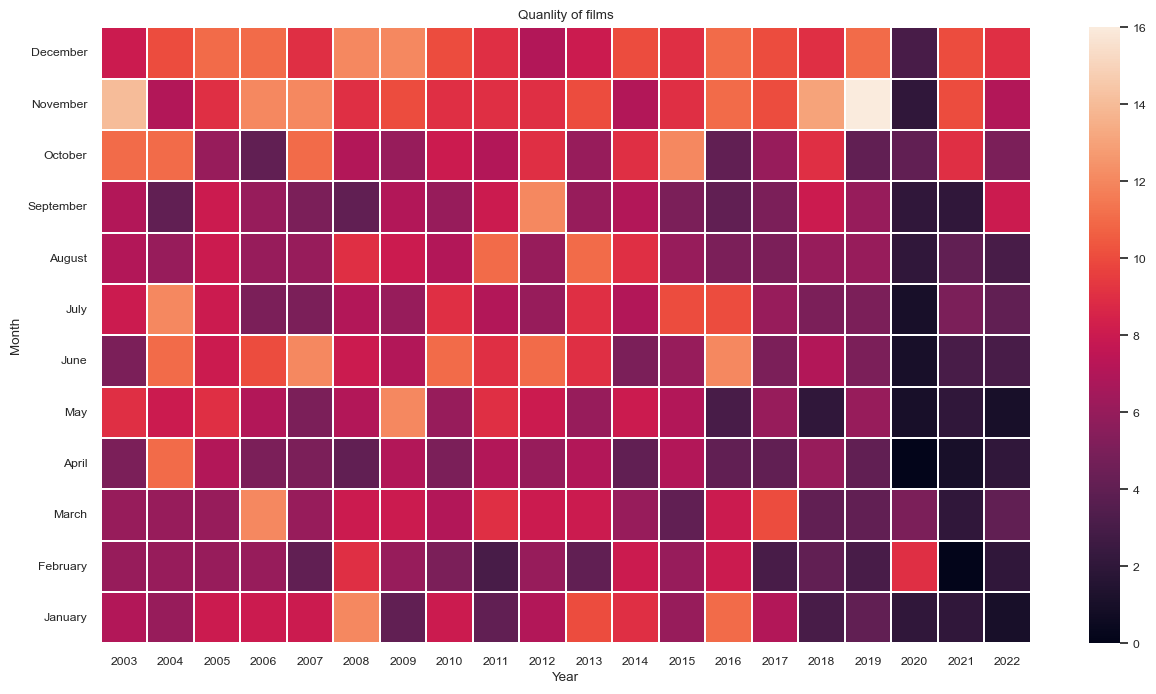

In [11]:
df['Month'].unique()
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month.reverse()
new_df = pd.DataFrame([], index = month)
year_min = df['Year'].min()
year_max = df['Year'].max()
for i in range(year_min, year_max+1):
    temp_list = []
    for j in month:
        temp_list.append(df[(df['Year'] == i) & (df['Month'] == j)].shape[0])
    new_df[i] = temp_list
new_df
plt.figure(figsize=(15,8))
sns.set(font_scale = 0.8)
sns.heatmap(new_df,linewidth=.25).set(xlabel='Year', ylabel='Month', title="Quanlity of films")
plt.show()

In [9]:
df.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117.0,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127.0,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States"
4,M3gan,6.4,2022,December,PG-13,102.0,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,1.712539e+08,United States
6,Amsterdam,6.1,2022,October,R,134.0,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,3.124581e+07,"United States, Japan"


In [10]:
arr = np.concatenate(np.array(df["Country_of_origin"].str.split(', ')))
unique_values, value_counts = np.unique(arr, return_counts=True)
dic = {}
for value, count in zip(unique_values, value_counts):
    for value, count in zip(unique_values, value_counts):
        dic[value] = count
dic = dict(sorted(dic.items(), key=lambda x:x[1], reverse=True))
dic

{'United States': 1529,
 'United Kingdom': 376,
 'Canada': 179,
 'France': 157,
 'Germany': 156,
 'China': 99,
 'Japan': 71,
 'Australia': 60,
 'Spain': 40,
 'Italy': 36,
 'Hong Kong': 28,
 'India': 27,
 'Mexico': 25,
 'Sweden': 25,
 'Belgium': 23,
 'New Zealand': 18,
 'Denmark': 17,
 'Czech Republic': 15,
 'South Korea': 15,
 'Hungary': 14,
 'Netherlands': 13,
 'Ireland': 11,
 'United Arab Emirates': 11,
 'Norway': 10,
 'South Africa': 10,
 'Luxembourg': 9,
 'Switzerland': 9,
 'Bulgaria': 8,
 'Malta': 7,
 'Russia': 6,
 'Taiwan': 6,
 'Brazil': 5,
 'Poland': 5,
 'Austria': 4,
 'Finland': 4,
 'Turkey': 4,
 'Argentina': 3,
 'Greece': 3,
 'Morocco': 3,
 'Romania': 3,
 'Chile': 2,
 'Colombia': 2,
 'Thailand': 2,
 'Bahamas': 1,
 'Croatia': 1,
 'Cyprus': 1,
 'Iceland': 1,
 'Indonesia': 1,
 'Iran': 1,
 'Israel': 1,
 'Jordan': 1,
 'Kenya': 1,
 'Lebanon': 1,
 'Paraguay': 1,
 'Philippines': 1,
 'Portugal': 1,
 'Qatar': 1,
 'Singapore': 1,
 'Slovenia': 1,
 'Tunisia': 1,
 'Uruguay': 1}